In [1]:
import torch
import torch.nn as nn
import torchvision 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


In [2]:
# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define hyper parameters
input_size = 784  # (as input images is 28*28 )
hidden_size = 100 # can be tuned
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# Import MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=r'C:\Pytorch Practice\Data\mnist_data', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root=r'C:\Pytorch Practice\Data\mnist_data', train=False, transform=transforms.ToTensor())
# Dataloaders
train_loaders =  DataLoader(dataset= train_dataset,batch_size=batch_size,shuffle= True)
test_loaders =  DataLoader(dataset= test_dataset,batch_size=batch_size,shuffle= False)

In [3]:
# check data
examples = iter(train_loaders)
samples, labels = next(examples)

samples.shape, labels.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

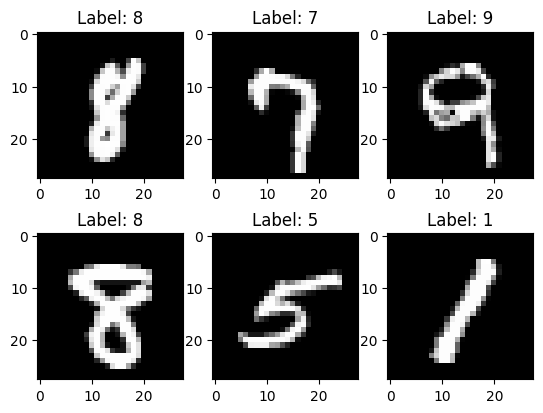

In [4]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap="gray")
    plt.title(f"Label: {labels[i].item()}")

plt.show()

In [5]:
# Define a neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size,hidden_size,num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
    
    def forward(self,x):
        output = self.l1(x)
        output = self.relu(output)
        output = self.l2(output)
        return output
   

In [7]:
# Model
model = NeuralNet(input_size,hidden_size,num_classes)
model = model.to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

# Training
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loaders):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs,labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
     
    
    print(f'Epoch {epoch+1}/{num_epochs}, loss = {loss.item()}')   
    
    
    
# Testing
n_correct = 0
n_samples = 0
with torch.no_grad():
    for images,labels in test_loaders:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        #(value,index)
        _,pred = torch.max(outputs,1)
        n_samples+= labels.shape[0]
        n_correct += (pred== labels).sum().item()
        
    acc = 100.0 * n_correct/n_samples
    print(f'Accuracy = {acc}%')
    
    
    
    


Epoch 1/2, loss = 0.41551437973976135
Epoch 2/2, loss = 0.23450683057308197
Accuracy = 95.29%
